# Problem Set 2
## Replicating figures from selected papers

Name: Juan Paolo B. Ignacio 

Student Number: 2021-07695 

Date of Creation: April 13, 2025 until May 19, 2025

### Defining the global and data paths for the replication of the figures.

- for each item/country for replication, a folder is dedicated for their respective files for proper organization.
- All of their sub-folders are contained within one folder, titled "Econ 138 Problem Set 2".

In [13]:
# Define a global file path variable
file_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2"

- The libraries below are all imported at the beginning because they will be appropriately applied to all replications throughout the codes.

In [192]:
!pip install shapely

In [200]:
# Standard library imports
import os

# Third-party imports
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import rasterio
import googlemaps
import osmnx as ox
import networkx as nx

# Local application/library specific imports
from rasterio.plot import show
from geopandas import GeoDataFrame
from geopandas import points_from_xy
from shapely.geometry import Point
from shapely.ops import unary_union
from shapely.ops import transform
from matplotlib.lines import Line2D

## #1: South Africa

Mettetal, E. (2019). Irrigation dams, water and infant mortality: Evidence from South Africa. Journal of Development Economics, 138, 17-40. Figure 2: Hydrodams in South Africa but instead of the river gradient, use the population density instead.

- In addition to the files provided to the class for this replication, 2020 population density data was also used for South Africa. The respective file, "zaf_pd_2020_1km.tif", is downloaded from https://data.humdata.org/dataset/worldpop-population-density-for-south-africa# 


In [91]:
# Define the data path variable for South Africa
data_SA_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//South Africa"

In [194]:
# Loading the local district boundaries of South Africa
sa_districts = gpd.read_file(os.path.join(data_SA_path, "SA_MDB_Local_Municipal_Boundary_2018//MDB_Local_Municipal_Boundary_2018.shp"))
sa_districts.info()

#To see the description of each variable and check their data types.
sa_districts.info()
print(sa_districts.crs)
print(sa_districts.columns)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FID         213 non-null    int32         
 1   OBJECTID    213 non-null    int32         
 2   PROVINCE    213 non-null    object        
 3   CATEGORY    213 non-null    object        
 4   CAT2        213 non-null    object        
 5   CAT_B       213 non-null    object        
 6   MUNICNAME   213 non-null    object        
 7   NAMECODE    213 non-null    object        
 8   MAP_TITLE   213 non-null    object        
 9   DISTRICT    213 non-null    object        
 10  DISTRICT_N  213 non-null    object        
 11  DATE        213 non-null    datetime64[ms]
 12  Shape__Are  213 non-null    float64       
 13  Shape__Len  213 non-null    float64       
 14  geometry    213 non-null    geometry      
dtypes: datetime64[ms](1), float64(2), geometry(1), int32(2), object(9)

<Axes: >

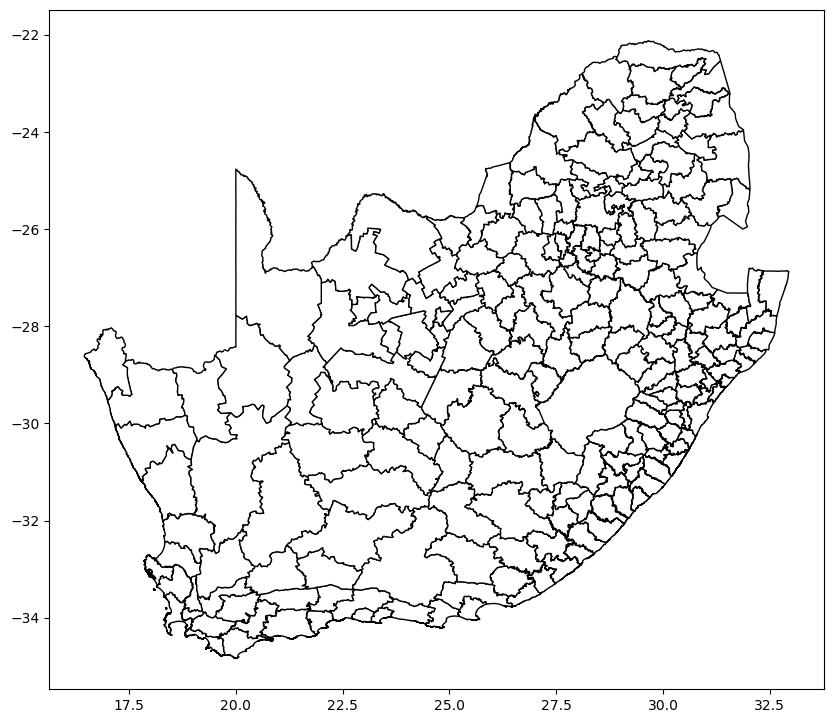

In [146]:
# Showing the map of the boundaries of South African districts
fig, ax = plt.subplots(figsize=(10, 10))
sa_districts.plot(ax=ax, color='white', edgecolor='black')

In [147]:
# Loading the dam locations in South Africa
sa_dams = pd.read_excel(os.path.join(data_SA_path, "Dams_south_africa.xlsx"))
sa_dams

,Name of dam,Latitude deg,Lat min,Lat sec,Longitude deg,Long min,Long sec
0,NGOTWANE DAM,25.0,11.0,54.0,25.0,48.0,48.0
1,MAKGOPANE DAM,25.0,5.0,54.2,25.0,52.0,57.0
2,ROODEKOPJES DAM,25.0,24.0,24.0,27.0,34.0,39.0
3,HARTBEESPOORT DAM,25.0,43.0,32.3,27.0,50.0,54.1
4,BUFFELSPOORT DAM,25.0,46.0,49.5,27.0,29.0,14.5
...,...,...,...,...,...,...,...
10307,TSHAKHUMA DAM,23.0,1.0,58.0,30.0,16.0,55.0
10308,KORENTEPOORT DAM,34.0,0.0,17.4,21.0,9.0,56.4
10309,GRASSRIDGE DAM,31.0,46.0,4.2,25.0,27.0,57.9
10310,KNELLPOORT DAM,29.0,46.0,54.4,26.0,53.0,19.2


- Seeing from the table above, it is required that we create new columns for two new variables 'Latitude' and 'Longitude' as float variables in order to properly plot them later on.
- To compute for the values of Longitude, we use the formula sa_dams["Longitude deg"] + sa_dams["Long min"]/60 + sa_dams["Long sec"]/3600.
- For the values of Latitude, we use the same order of the equation with its counterparts, however, all the signs must be negative. This is because if we plot the dam locations, having the Latitude with negative signs will generate the figure in its proper orientation, unlike when the Latitude values are positive.
- Once we generated the new columns for Longitude and Latitude, we use both of them to create a "geometry" column for the x and y coordinates of each dam for plotting. Then, we convert the sa_dams into a geodataframe to be suited for creating a map.

In [148]:
# Converting the latitude deg and longitude deg values into decimal degrees.
sa_dams["Latitude"] = -sa_dams["Latitude deg"] - sa_dams["Lat min"]/60 - sa_dams["Lat sec"]/3600
sa_dams["Longitude"] = sa_dams["Longitude deg"] + sa_dams["Long min"]/60 + sa_dams["Long sec"]/3600

print(sa_dams[["Name of dam", "Latitude", "Longitude"]].head())

         Name of dam   Latitude  Longitude
0       NGOTWANE DAM -25.198333  25.813333
1      MAKGOPANE DAM -25.098389  25.882500
2    ROODEKOPJES DAM -25.406667  27.577500
3  HARTBEESPOORT DAM -25.725639  27.848361
4   BUFFELSPOORT DAM -25.780417  27.487361


In [149]:
# Adding a geometry column in the sa_dams dataframe for conversion into geodata
sa_dams['geometry'] = points_from_xy(sa_dams['Longitude'], sa_dams['Latitude'])

# Converting it into geodata
sa_dams_gdf = gpd.GeoDataFrame(sa_dams, geometry='geometry')

# Setting a Coordinate Reference System (CRS), e.g., EPSG:4326 (WGS84)
sa_dams_gdf.set_crs(epsg=4326, inplace=True)

,Name of dam,Latitude deg,Lat min,Lat sec,Longitude deg,Long min,Long sec,Latitude,Longitude,geometry
0,NGOTWANE DAM,25.0,11.0,54.0,25.0,48.0,48.0,-25.198333,25.813333,POINT (25.81333 -25.19833)
1,MAKGOPANE DAM,25.0,5.0,54.2,25.0,52.0,57.0,-25.098389,25.882500,POINT (25.8825 -25.09839)
2,ROODEKOPJES DAM,25.0,24.0,24.0,27.0,34.0,39.0,-25.406667,27.577500,POINT (27.5775 -25.40667)
3,HARTBEESPOORT DAM,25.0,43.0,32.3,27.0,50.0,54.1,-25.725639,27.848361,POINT (27.84836 -25.72564)
4,BUFFELSPOORT DAM,25.0,46.0,49.5,27.0,29.0,14.5,-25.780417,27.487361,POINT (27.48736 -25.78042)
...,...,...,...,...,...,...,...,...,...,...
10307,TSHAKHUMA DAM,23.0,1.0,58.0,30.0,16.0,55.0,-23.032778,30.281944,POINT (30.28194 -23.03278)
10308,KORENTEPOORT DAM,34.0,0.0,17.4,21.0,9.0,56.4,-34.004833,21.165667,POINT (21.16567 -34.00483)
10309,GRASSRIDGE DAM,31.0,46.0,4.2,25.0,27.0,57.9,-31.767833,25.466083,POINT (25.46608 -31.76783)
10310,KNELLPOORT DAM,29.0,46.0,54.4,26.0,53.0,19.2,-29.781778,26.888667,POINT (26.88867 -29.78178)


- To check if the crs is appropriate for generating the map.

In [150]:
print(sa_districts.crs)  # Check the CRS of district boundaries
print(sa_dams_gdf.crs)   # Check the CRS of dam points

EPSG:4326
EPSG:4326


- We now plot the district boundaries and the dam locations to see what they initially look like.

C:\Users\Juan Paolo Ignacio\AppData\Local\Temp\ipykernel_2472\2068546352.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


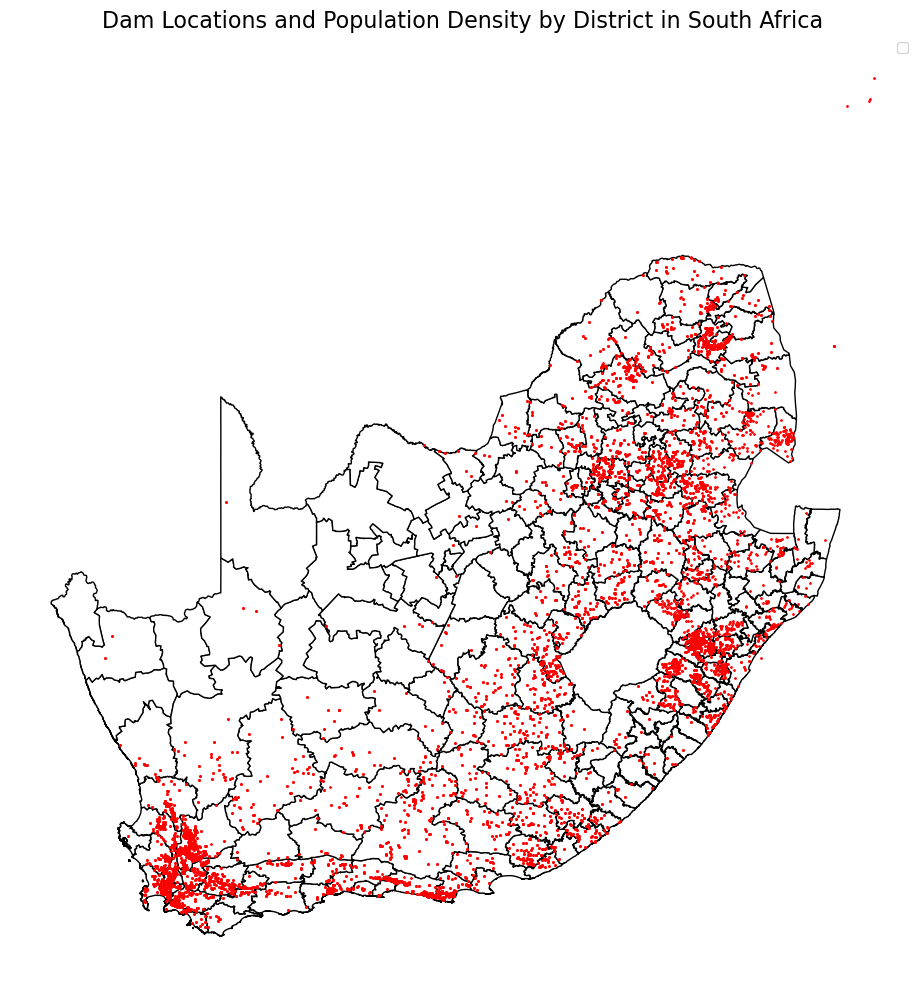

In [151]:
fig, ax = plt.subplots(figsize=(10, 10))
sa_districts.plot(ax=ax, color='white', edgecolor='black')
sa_dams_gdf.plot(ax=ax, color='red', markersize=1)

plt.title("Dam Locations and Population Density by District in South Africa", fontsize=16)
plt.axis("off")
plt.legend()
plt.tight_layout()
plt.show()

- We now use the tif file for the population density of South Africa in 2020. I now combine the sa_popden to the sa_districts dataframe to overlap the population density per district.

In [152]:
# We use 2020 population density data for South Africa.
sa_popden = rasterio.open(os.path.join(data_SA_path, "zaf_pd_2020_1km.tif"))
sa_districts = sa_districts.to_crs(sa_popden.crs)

C:\Users\Juan Paolo Ignacio\AppData\Local\Temp\ipykernel_2472\2834403551.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


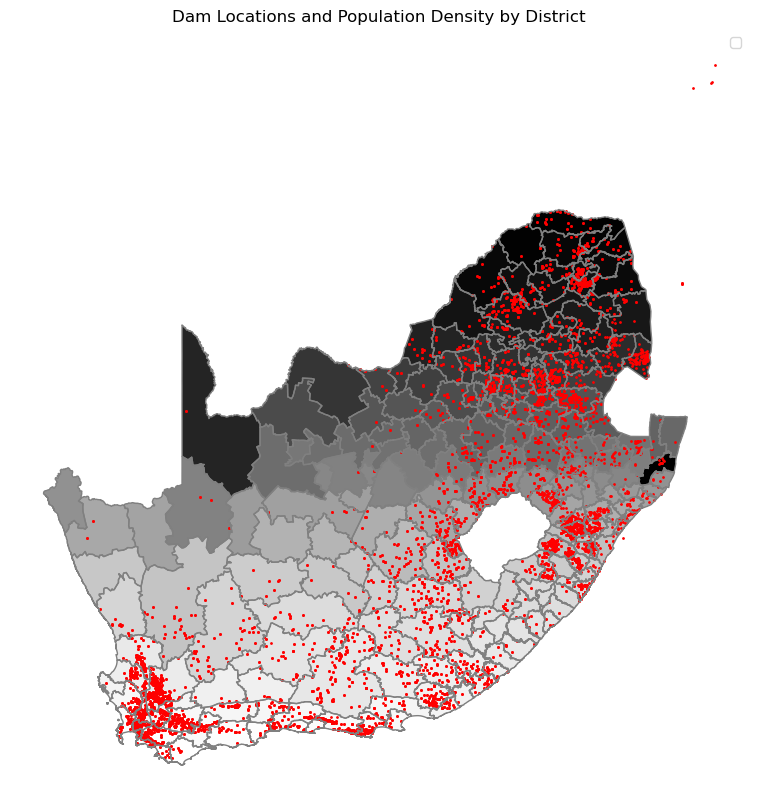

In [153]:
# Replicating the figure with population density per district instead of river gradient per district.
fig, ax = plt.subplots(figsize=(10, 10))
sa_districts.boundary.plot(ax=ax, edgecolor="gray", linewidth=1)
sa_districts.plot(ax=ax, legend=True, cmap="Greys", 
                      legend_kwds={"label": "Population Density (people/km²)", "orientation": "horizontal"})
sa_dams_gdf.plot(ax=ax, color='red', markersize=1)

plt.legend()
plt.title("Dam Locations and Population Density by District")
plt.axis("off")
plt.show()

## #2: Ethiopia

Fried, S., & Lagakos, D. (2021). Rural electrification, migration and structural transformation: Evidence from Ethiopia. Regional Science and Urban Economics, 91, 103625. Figure 4: Ethiopian Population density and ERSS Sample Villages


In [155]:
# Define the data path variable for Ethiopia
data_Ethiopia_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Ethiopia"

- For this replication, we first load all the dataframes needed for the figure: Ethiopia districts, roads, electric networks, and generators.

In [156]:
# Load Ethiopia districts
eth_districts_gdf = gpd.read_file(os.path.join(data_Ethiopia_path, "Ethiopia_AdminBoundaries-shp//Ethiopia_AdminBoundaries.shp"))
print(eth_districts_gdf.crs)
eth_districts_gdf

EPSG:4326


,OBJECTID,REGIONNAME,ZONENAME,WOREDANO_,WOREDANAME,GlobalID,Shape__Are,Shape__Len,geometry
0,1,Addis Ababa,Region 14,140102,Nefas Silk,695a39eb-38a2-4680-82e3-c34d7559ee45,6.019472e+07,42074.127942,"MULTIPOLYGON (((38.70186 8.92537, 38.70185 8.9..."
1,2,Addis Ababa,Region 14,140104,Bole,d21bf315-15e2-40eb-9a55-92e102600a0f,1.317679e+08,57202.004332,"POLYGON ((38.89908 8.95556, 38.89754 8.95547, ..."
2,3,Addis Ababa,Region 14,140105,Lideta,7f82355a-ed21-48bd-9d49-2e3cb58b824b,1.134951e+07,20053.075002,"POLYGON ((38.75398 9.01721, 38.75398 9.01718, ..."
3,4,Addis Ababa,Region 14,140106,Kirkos,deb15e6d-331b-433e-bdb8-cd5dfca4bb79,1.512233e+07,19354.492903,"POLYGON ((38.76493 9.02229, 38.76499 9.02216, ..."
4,5,Addis Ababa,Region 14,140107,Yeka,1f7e0179-f18e-43c1-9838-9ad28d2a6e1a,8.901921e+07,47690.016803,"POLYGON ((38.89684 9.02942, 38.89097 9.02327, ..."
...,...,...,...,...,...,...,...,...,...
679,680,SNNPR,Gurage,070109,Gumer,823c7b7c-ab26-4255-b459-d4ea57fdffc8,2.042026e+08,67203.178529,"POLYGON ((38.0664 7.89435, 38.06031 7.88358, 3..."
680,681,SNNPR,Segen Peoples',None,Alle,f689ede0-c182-4331-aa83-cdb26c99382e,1.065196e+09,183068.475861,"POLYGON ((37.12637 5.72452, 37.12725 5.72444, ..."
681,682,SNNPR,Segen Peoples',071601,Derashe,9e03bdc6-a6b3-41f4-a48e-7b95682fb9b3,7.265555e+08,179539.187123,"POLYGON ((37.56279 5.71065, 37.56576 5.69569, ..."
682,683,SNNPR,Gamo Gofa,071012,Kemba,d269c6a4-ba68-4f20-b6cd-4f9a70f03bc9,1.264534e+09,186707.754503,"POLYGON ((37.2945 5.98755, 37.28325 5.98294, 3..."


In [157]:
# Load road data
roads = gpd.read_file(os.path.join(data_Ethiopia_path, "ethiopia_roads//Ethiopia_Roads.shp"))
print(roads.crs)
roads

EPSG:4326


C:\Users\Juan Paolo Ignacio\anaconda3\Lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured LineString' is converted to 'LineString'
  return ogr_read(


,LINKNO,ROADNO,STARTKM,ENDKM,LENGTHKM,STARTDESC,ENDDESC,CLASSLOC,CLASS,REGION,WIDTH,LANES,PAVEMTYPE,SURFTYPE,CONDITION,AADT,geometry
0,A3-8,A3,0.0,54.0,54.00,Bahirdar,Woreta,Trunk,Primary,Amhara,7.0,2.0,Asphalt,Paved,Very Good,481.0,"LINESTRING (37.69034 11.91356, 37.69021 11.913..."
1,A3-9,A3,0.0,102.0,102.00,Woreta,Azezo Airport,Trunk,Primary,Amhara,7.0,2.0,Asphalt,Paved,Very Good,572.0,"LINESTRING (37.42349 12.54866, 37.42343 12.547..."
2,A3-a,A3,0.0,7.0,7.00,Fiche,Commando,Trunk,Primary,Oramia,7.0,2.0,Asphalt,Paved,Very Good,500.0,"LINESTRING (38.74157 9.80978, 38.74088 9.80802..."
3,A4-1,A4,0.0,40.0,40.00,Addis,Holeta,Trunk,Primary,Oramia,7.0,2.0,Asphalt,Paved,Very Good,544.0,"LINESTRING (38.49822 9.07636, 38.503 9.0795, 3..."
4,A4-2,A4,0.0,85.0,84.88,Holeta,Ambo,Trunk,Primary,Oramia,0.0,2.0,ST,Paved,Unknown,544.0,"LINESTRING (37.85817 8.98209, 37.86025 8.98208..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,A2-8a,A2,0.0,68.0,68.00,Alamata,Moheny - Michew,Trunk,Primary,Tigray,7.0,2.0,Unpaved,Unpaved,Poor,200.0,"LINESTRING (39.55844 12.41391, 39.56115 12.416..."
72,A2-8b,A2,0.0,68.0,68.00,Moheny,Hewane,Trunk,Primary,Tigray,7.0,2.0,Unpaved,Unpaved,Poor,200.0,"LINESTRING (39.64221 12.79376, 39.6448 12.7994..."
73,A10-6,A10,0.0,51.0,51.00,Harar,Bombas,Trunk,Primary,Oramia,7.0,2.0,Gravel,Unpaved,Unknown,734.0,"LINESTRING (42.1218 9.31263, 42.12193 9.31264,..."
74,A5-6,A5,0.0,41.0,41.00,Jimma,Bedele,Trunk,Primary,Oramia,7.0,2.0,Asphalt,Paved,Unknown,385.0,"LINESTRING (36.83185 7.67618, 36.8342 7.67918,..."


In [158]:
# Load electricity transmission network data
eltrc_network = gpd.read_file(os.path.join(
    data_Ethiopia_path, "ethiopia-electricity-transmission-network//Ethiopia Electricity Transmission Network.shp")
                     )
print(eltrc_network.crs)
eltrc_network

EPSG:4326


,COUNTRY,CNTRY_NAME,VOLTAGE_KV,FROM_NM,TO_NM,STATUS,SOURCES,PROJECT_NM,geometry
0,ETH,ETHIOPIA,66,ADWA,ENDASILASIE,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (38.27211 14.08944, 38.88819 14.14845)"
1,ETH,ETHIOPIA,132,MEKELE,ADWA,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (38.88819 14.14845, 39.00201 13.838..."
2,ETH,ETHIOPIA,132,MEKELE,ADIGRAT,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (39.47528 13.49667, 39.59 13.79, 39..."
3,ETH,ETHIOPIA,230,MEKELE,TEKEZE,Under Construction,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (39.47528 13.49667, 38.71 13.3)"
4,ETH,ETHIOPIA,230,ALAMATA,MEKELE,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (39.5618 12.41469, 39.65293 12.6018..."
...,...,...,...,...,...,...,...,...,...
95,ETH,ETHIOPIA,66,DIREDAWA,HARER,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (41.86667 9.58333, 41.8726 9.56553,..."
96,ETH,ETHIOPIA,45,ADDISABABA,DEBREZEYT,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (38.98622 8.74522, 38.78869 8.96225..."
97,ETH,ETHIOPIA,45,ADDISABABA,GEJADERA,Existing,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (38.65 8.76667, 38.76856 8.971)"
98,ETH,ETHIOPIA,400,SODDO,GILGEL GIBE III,Under Construction,"WB map archive IBRD #34623 (Apr 2006), #35496 ...",None,"LINESTRING (37.76393 6.86822, 37.32099 6.84769)"


In [159]:
# Load generators data
gen = gpd.read_file(os.path.join(data_Ethiopia_path, "Ethiopia_-_generators-shp//Ethiopia_-_generators.shp"))
print(gen.crs)
gen

EPSG:4326


,PPE__Gener,Location,Sub_locati,Asset_Prof,Pcode,LongX,LatY,Descriptio,Model,Acquisitio,Tag_Number,Custodian,Status,NBV_USD,FID,geometry
0,Ethiopia,"Addis Ababa, Ethiopia","Addis Ababa,",GENERAT_60,ETHp000804,38.728447,8.998292,GEN PERKINS 45 KVA WATER COOLE,None,2008,86051,UNHCR,Damaged,0.000000,1,POINT (38.72845 8.99829)
1,Ethiopia,"Addis Ababa, Ethiopia","Addis Ababa,",GENERAT_60,ETHp000804,38.728447,8.998292,GENERATOR,None,2009,522841,AFRICAN HUMANITARIAN AID & DEV.,Damaged,0.000000,2,POINT (38.72845 8.99829)
2,Ethiopia,"Addis Ababa, Ethiopia","Addis Ababa,",GENERAT_60,ETHp000804,38.728447,8.998292,"GENERATOR 10 KWA, DIESEL","Generator 10 KWA, Diesel",2012,557829,UNHCR,In Service,0.000000,3,POINT (38.72845 8.99829)
3,Ethiopia,"Addis Ababa, Ethiopia","Addis Ababa,",GENERAT_60,ETHp000804,38.728447,8.998292,GENERATOR WITH PERKINS ENGINE,None,2013,611050,UNHCR,In Service,0.000000,4,POINT (38.72845 8.99829)
4,Ethiopia,"Addis Ababa, Ethiopia","Addis Ababa,",GENERAT_60,ETHp000804,38.728447,8.998292,"GENERATOR, PERKINS, WC/60 KVA",None,2011,557731,UNHCR,Damaged,0.000000,5,POINT (38.72845 8.99829)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ethiopia,UNHCR Gambella Warehouse,Gambella,GENERAT_60,ETHp000136,34.590260,8.239168,GENERATOR,None,2010,557677,UNHCR,Damaged,0.000000,96,POINT (34.59026 8.23917)
96,Ethiopia,UNHCR Gambella Warehouse,Gambella,GENERAT_60,ETHp000136,34.590260,8.239168,GENERATOR WITH PERKINS ENGINE,None,2012,557817,UNHCR,Damaged,0.000000,97,POINT (34.59026 8.23917)
97,Ethiopia,UNHCR Gambella Warehouse,Gambella,GENERAT_60,ETHp000136,34.590260,8.239168,"PERKINS GEN 100 KVA, WATER COO",None,2014,611441,UNHCR,In Service,3377.310059,98,POINT (34.59026 8.23917)
98,Ethiopia,UNHCR Gambella Warehouse,Gambella,GENERAT_60,ETHp000136,34.590260,8.239168,"PERKINS GEN 60 KVA, WATER COOL",None,2015,624344,UNHCR,In Service,5370.160156,99,POINT (34.59026 8.23917)


- Then, we plot these shapefiles to see what it initially looks like before proceeding to marking the locations of the ERSS sample villages.

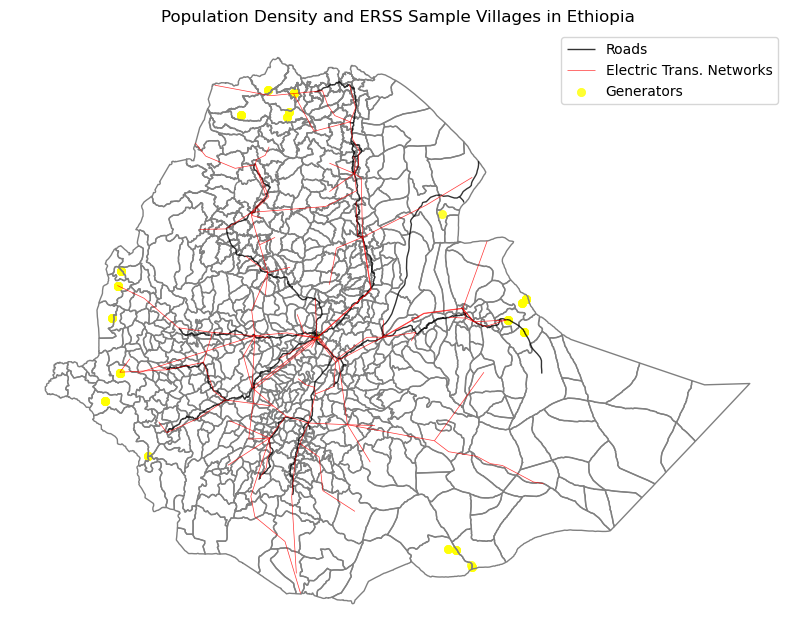

In [160]:
# Plotting the shapefiles first before updating it with population density variable
fig, ax = plt.subplots(figsize=(10, 10))
eth_districts_gdf.boundary.plot(ax=ax, edgecolor="gray", linewidth=1)
roads.plot(ax=ax, color="black", linewidth=1, label="Roads", alpha=0.8)
eltrc_network.plot(ax=ax, color="red", linewidth=0.5, label="Electric Trans. Networks", alpha=0.8)
gen.plot(ax=ax, color="yellow", linewidth=0.5, label="Generators", alpha=0.8)


plt.legend()
plt.title("Population Density and ERSS Sample Villages in Ethiopia")
plt.axis("off")
plt.show()

In [161]:
# Load ERSS sample villages (with lat/lon columns)
erss_villages = pd.read_csv(os.path.join(data_Ethiopia_path, "ETH_2011_ERSS_v02_M_CSV//pub_eth_householdgeovariables_y1.csv"))
erss_villages

,household_id,ea_id,qa_type,dist_road,dist_popcenter,dist_market,dist_borderpost,dist_admctr,af_bio_1,af_bio_8,...,eviarea_avg,evimax_avg,grn_avg,sen_avg,h2011_eviarea,h2011_evimax,h2011_grn,h2011_sen,LAT_DD_MOD,LON_DD_MOD
0,1010101601002,1010101601,1,50.3,53.2,105.3,133.9,198.4,264,258,...,47,0.4357,178,257,41,0.3747,185,264,14.353816,37.890876
1,1010101601017,1010101601,1,50.0,52.9,105.6,134.6,198.0,263,257,...,47,0.4357,178,257,41,0.3747,185,264,14.353816,37.890876
2,1010101601034,1010101601,1,46.0,49.2,100.1,135.1,194.6,262,256,...,47,0.4357,178,257,41,0.3747,185,264,14.353816,37.890876
3,1010101601049,1010101601,1,46.0,49.2,100.1,135.1,194.6,262,256,...,47,0.4357,178,257,41,0.3747,185,264,14.353816,37.890876
4,1010101601064,1010101601,1,46.1,49.3,100.1,135.0,194.8,262,256,...,47,0.4357,178,257,41,0.3747,185,264,14.353816,37.890876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,15010203102067,15010203102,1,19.6,53.3,54.8,110.9,56.3,238,257,...,25,0.2307,216,264,22,0.2100,201,263,9.746772,42.308967
3913,15010203102087,15010203102,1,19.3,53.1,54.6,111.3,55.9,238,257,...,25,0.2307,216,264,22,0.2100,201,263,9.746772,42.308967
3914,15010203102099,15010203102,1,19.4,53.0,54.5,111.2,55.9,238,257,...,25,0.2307,216,264,22,0.2100,201,263,9.746772,42.308967
3915,15010203102109,15010203102,1,19.4,53.0,54.5,111.3,55.9,238,257,...,25,0.2307,216,264,22,0.2100,201,263,9.746772,42.308967


- From the table above, similar to South African dams, we use the Latitude and Longitude columns to plot the villages in the figure.
- But before that, we must group all rows of the same latitude and longitude values by "ea_id". Then we create a geometry variable for the x and y coordinates of the villages using the longitude and latitude columns, and combine it with the eth_districts_gdf.

In [196]:
# Load World Bank survey data
erss_villages = pd.read_csv(os.path.join(data_Ethiopia_path, "ETH_2011_ERSS_v02_M_CSV//pub_eth_householdgeovariables_y1.csv"))
erss_villages = erss_villages.groupby("ea_id").agg({
    "LAT_DD_MOD": "mean",
    "LON_DD_MOD": "mean"
}).reset_index()

# Create a GeoDataFrame for survey data.
geometry = [Point(xy) for xy in zip(erss_villages["LON_DD_MOD"], erss_villages["LAT_DD_MOD"])]
erss_villages_geo = gpd.GeoDataFrame(erss_villages, geometry=geometry, crs="EPSG:4326")
erss_villages_geo = erss_villages_geo.to_crs(eth_districts_gdf.crs)

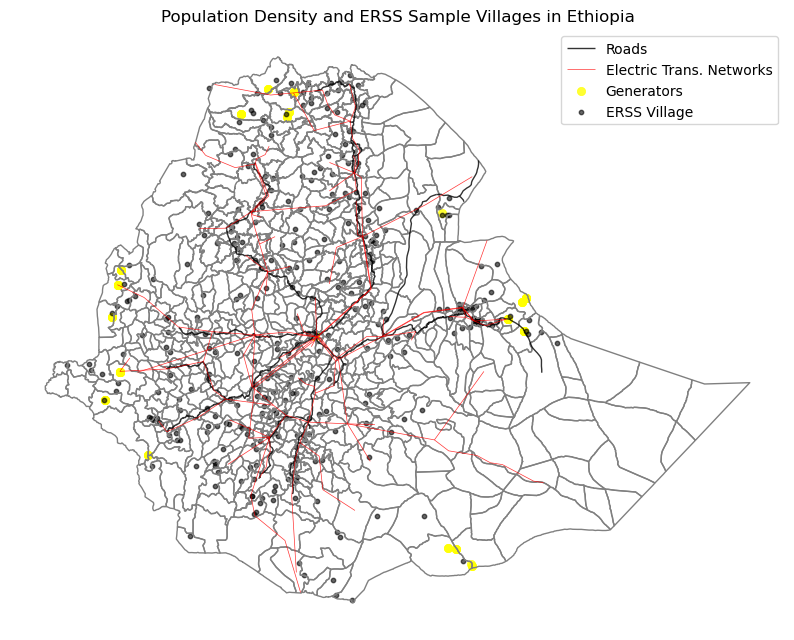

In [163]:
# Overlaying the dots for the ERSS villages on the map.
fig, ax = plt.subplots(figsize=(10, 10))
eth_districts_gdf.boundary.plot(ax=ax, edgecolor="gray", linewidth=1)
roads.plot(ax=ax, color="black", linewidth=1, label="Roads", alpha=0.8)
eltrc_network.plot(ax=ax, color="red", linewidth=0.5, label="Electric Trans. Networks", alpha=0.8)
gen.plot(ax=ax, color="yellow", linewidth=0.5, label="Generators", alpha=0.8)
erss_villages_geo.plot(ax=ax, color="black", marker='o', markersize=10, alpha=0.6, label="ERSS Village")

plt.legend()
plt.title("Population Density and ERSS Sample Villages in Ethiopia")
plt.axis("off")
plt.show()


- To proceed with the overlaying of population density in Ethiopia, we use 2020 population data from https://data.humdata.org/dataset/worldpop-population-counts-for-ethiopia/resource/f779b518-2e9c-4730-8220-3304003469ae
- We continue the process, then finally, we plot all the shapefiles to replicate the figure.
- Moreover, I recognize that the population density data used is different from the one being replicated.

In [168]:
# Getting the population data of Ethiopia (2020)
eth_popden = rasterio.open(os.path.join(data_Ethiopia_path, "eth_ppp_2020.tif"))
eth_districts_gdf = eth_districts_gdf.to_crs(eth_popden.crs)

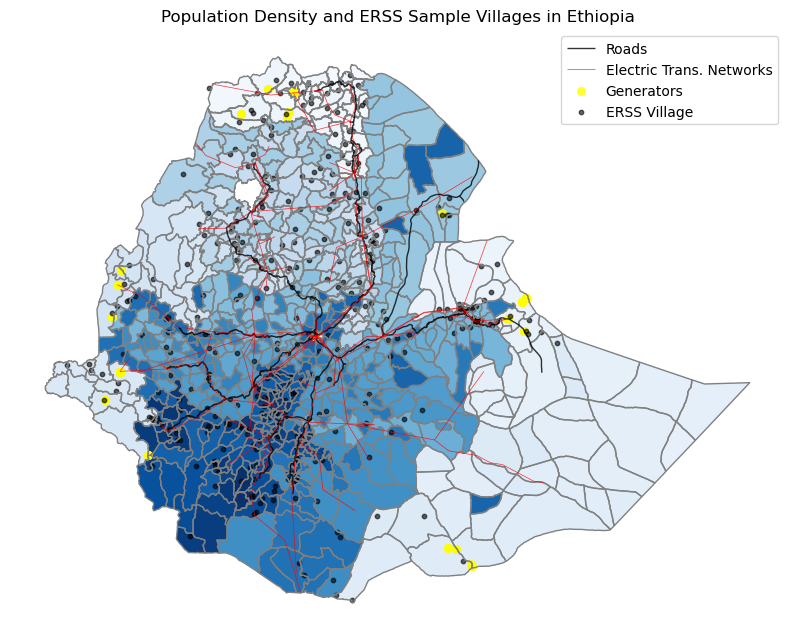

In [171]:
# Overlaying the dots for the ERSS villages on the map.
fig, ax = plt.subplots(figsize=(10, 10))

eth_districts_gdf.boundary.plot(ax=ax, edgecolor="gray", linewidth=1)
eth_districts_gdf.plot(ax=ax, legend=True, cmap="Blues", 
                      legend_kwds={"label": "Population Density (people/km²)", "orientation": "horizontal"})

roads.plot(ax=ax, color="black", linewidth=1, label="Roads", alpha=0.8)

eltrc_network.plot(ax=ax, color="red", linewidth=0.5, label="Electric Trans. Networks", alpha=0.8)

gen.plot(ax=ax, color="yellow", linewidth=0.5, label="Generators", alpha=0.8)

erss_villages_geo.plot(ax=ax, color="black", marker='o', markersize=10, alpha=0.6, label="ERSS Village")

plt.legend()
plt.title("Population Density and ERSS Sample Villages in Ethiopia")
plt.axis("off")
plt.show()

## #3: Vietnam

Balboni, C. (2025). In harm's way? infrastructure investments and the persistence of coastal cities. American Economic Review, 115(1), 77-116. Figure 3: Roadmap of Vietnam (not necessarily in 2010 but still replicate the road types)


In [172]:
# Define the data path variable for Vietnam
data_Vietnam_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Vietnam"

- The Vietname boundary data is gathered from https://gadm.org/download_country.html#google_vignette 

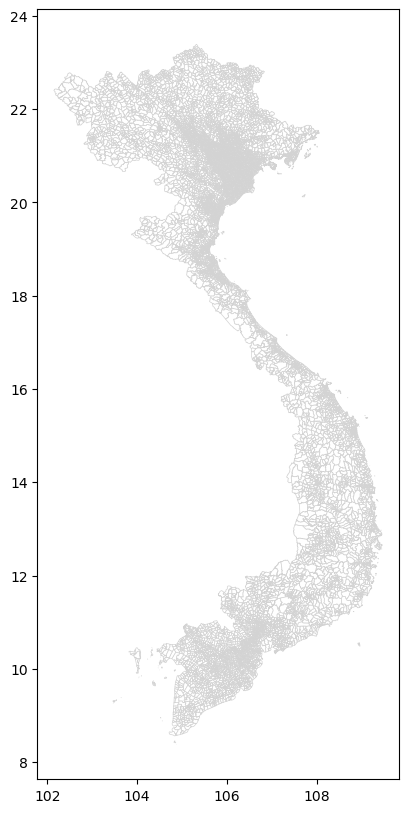

In [176]:
# Vietname boundaries shapefile
Vietnam_boundaries = gpd.read_file(os.path.join(data_Vietnam_path, "gadm41_VNM_3.shp"))

# Plotting the Vietnam boundaries
fig, ax = plt.subplots(figsize=(12, 10))

Vietnam_boundaries.plot(ax=ax, linewidth=0.5, facecolor="white", edgecolor="lightgray")
plt.show()

- The replication used 2025 road data of Vietnam from https://download.geofabrik.de/asia/vietnam.html.
- The 2025 road data will significantly show that many roads have been constructed since 2010.

In [177]:
# Roads shapefile
Vietnam_roads = gpd.read_file("C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Vietnam//gis_osm_roads_free_1.shp")

In [178]:
# Check unique road types (in the 'fclass' column)
print(Vietnam_roads['fclass'].unique())

['footway' 'residential' 'primary' 'tertiary' 'primary_link' 'secondary'
 'trunk' 'service' 'motorway' 'motorway_link' 'unclassified'
 'secondary_link' 'path' 'pedestrian' 'tertiary_link' 'track' 'steps'
 'trunk_link' 'cycleway' 'living_street' 'track_grade1' 'track_grade5'
 'track_grade4' 'track_grade3' 'unknown' 'track_grade2' 'busway'
 'bridleway']


- I grouped the road ctaegories under road_types in order to identify which of them fall under the categories seen from the original figure's legend.
- For Freeway: motorway and motorway_link | Dual Carriageway: trunk and trunk_link | Major Roads: secondary | Minor Roads: secondary_link, tertiary, tertiary_link, residential, primary, primary_link, living_street
- For the Other Roads, I identified these respective road types under the set of categorized_fclasses, so that I can easily gather all other road categories from all_fclasses. This will be done by other_fclasses = all_fclasses - categorized_fclasses.

In [179]:
road_types = {
    'Freeway': {
        'fclasses': ['motorway', 'motorway_link'],
        'color': 'blue',
        'linewidth': 1.5
    },
    
    'Dual Carriageway': {
        'fclasses': ['trunk', 'trunk_link'],
        'color': 'darkgreen',
        'linewidth': 1.1
    },
    
    'Major Roads': {
        'fclasses': ['secondary'],
        'color': 'red',
        'linewidth': 0.5
    },
    
    'Minor Roads': {
        'fclasses': ['secondary_link', 'tertiary', 'tertiary_link', 'residential', 
                     'primary', 'primary_link', 'living_street'],
        'color': 'orange',
        'linewidth': 0.5
    }
}

In [180]:
all_fclasses = set(Vietnam_roads['fclass'].unique())
categorized_fclasses = set(fclass for v in road_types.values() for fclass in v['fclasses'])
other_fclasses = all_fclasses - categorized_fclasses

In [199]:
# We add another road type, the 'Other Roads'. They are much visually smaller than minor roads, based on the original figure.
road_types['Other Roads'] = {
    'fclasses': list(other_fclasses),
    'color': 'yellow',
    'linewidth': 0.1
}

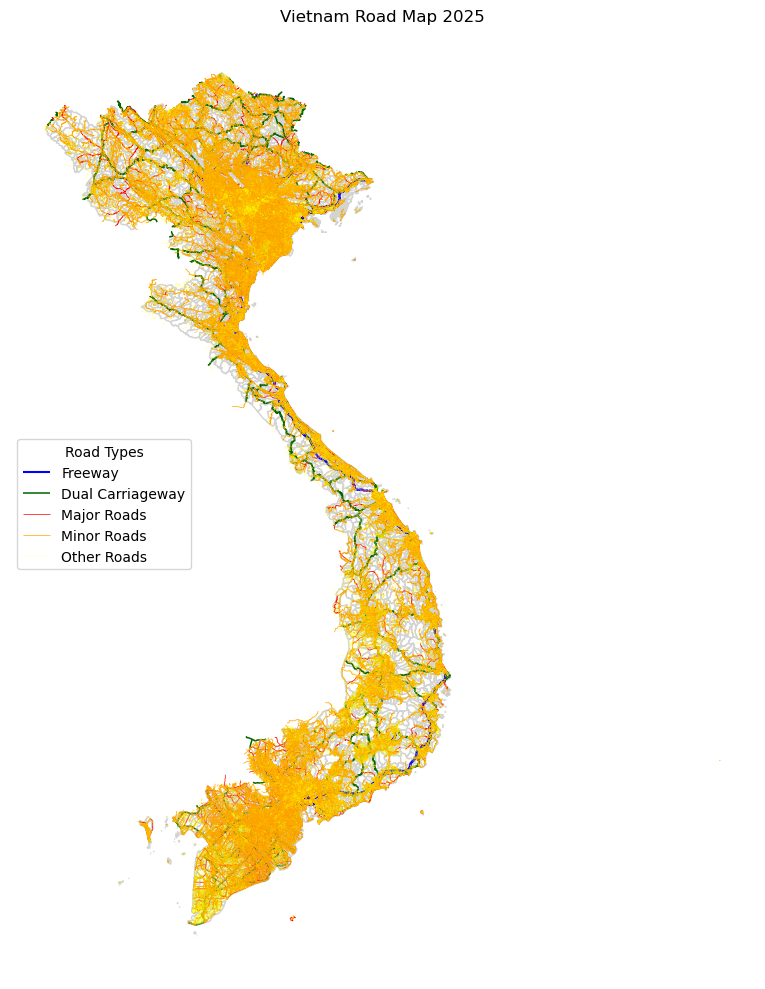

In [182]:
# We now replicate the figure using 2025 road data.
fig, ax = plt.subplots(figsize=(12, 10))

for label, props in road_types.items():
    fclasses = props['fclasses']
    color = props['color']
    lw = props['linewidth']
    subset = Vietnam_roads[Vietnam_roads['fclass'].isin(fclasses)]
    
    if not subset.empty:
        subset.plot(ax=ax, linewidth=lw, color=color, label=label)

Vietnam_boundaries.plot(ax=ax, linewidth=1, facecolor="white", edgecolor="lightgray")

ax.legend(title='Road Types', loc='center left')
ax.set_title("Vietnam Road Map 2025")
ax.axis('off')
plt.tight_layout()
plt.show()

## #4: Brazil

Morten, M., & Oliveira, J. (2024). The effects of roads on trade and migration: Evidence from a planned capital city. American Economic Journal: Applied Economics, 16(2), 389-421. Figure 1: Brazil's Capital and Main Road Infrastructure.


- All the data used here is from the replication files from https://www.aeaweb.org/articles?id=10.1257/app.20180487

In [183]:
# Define the data path variable for Vietnam
data_Brazil_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Brazil"

In [201]:
# Set your data directory
GIS_data = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Brazil//Data//GIS_data"

In [209]:
# Read and simplify shapefiles
def read_and_simplify(path, tolerance=0.01):
    """
    Reads a shapefile from the specified path and simplifies its geometries.
    
    Parameters:
    - path (str): Path to the shapefile.
    - tolerance (float): Simplification tolerance. Higher means more simplification.
    
    Returns:
    - GeoDataFrame: Simplified geometries with topology preserved.
    """
    
    gdf = gpd.read_file(path)
    return gdf.simplify(tolerance, preserve_topology=True)

In [210]:
# Load shapefiles on state boundaries (from 1940s, simplified)
states = read_and_simplify(os.path.join(GIS_data, "uf1940//uf1940_prj.shp"))
states

0     POLYGON ((-71.07772 -9.82774, -71.16301 -9.875...
1     POLYGON ((-60.20051 5.26434, -60.19523 5.23823...
2     MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ...
3     MULTIPOLYGON (((-44.9662 -1.27114, -44.88522 -...
4     POLYGON ((-42.91509 -6.64795, -42.87215 -6.513...
5     POLYGON ((-41.18292 -4.01797, -41.25673 -4.034...
6     MULTIPOLYGON (((-37.04412 -4.81854, -37.04501 ...
7     MULTIPOLYGON (((-34.79576 -7.35, -34.79614 -7....
8     MULTIPOLYGON (((-32.3924 -3.82372, -32.3932 -3...
9     MULTIPOLYGON (((-35.75791 -9.69285, -35.75839 ...
10    MULTIPOLYGON (((-36.91665 -10.84277, -36.91854...
11    MULTIPOLYGON (((-38.69616 -17.97901, -38.69629...
12    POLYGON ((-50.74037 -19.21316, -50.73415 -19.1...
13    MULTIPOLYGON (((-40.75189 -20.92722, -40.75601...
14    MULTIPOLYGON (((-41.82923 -22.78453, -41.82976...
15    MULTIPOLYGON (((-48.03716 -25.35794, -48.03773...
16    MULTIPOLYGON (((-48.40736 -25.8427, -48.4092 -...
17    MULTIPOLYGON (((-48.60084 -28.35222, -48.6

In [211]:
# Load shapefiles on highways (from 2000)
highways = gpd.read_file(os.path.join(GIS_data, "roads//2000//highways_2000_prj.shp"))
highways

,OBJECTID,id_trecho_,vl_br,sg_uf,nm_tipo_tr,sg_tipo_tr,desc_coinc,vl_codigo,ds_local_i,ds_local_f,...,versao_snv,id_versao,marcador,ICS,Shape_Leng,LABEL,dm_anlys,dm_anlys_p,dm_radial,geometry
0,44,151197.0,010,PA,Eixo Principal,B,-,010BPA0670,ENTR PA-251/322/456 (SÃO MIGUEL DO GUAMA),SANTA MARIA DO PARÁ,...,201609C,32.0,|,None,0.289649,BR-010,1,1,1,"LINESTRING (-47.47942 -1.62015, -47.47943 -1.6..."
1,45,151198.0,010,PA,Eixo Principal,B,-,010BPA0690,SANTA MARIA DO PARÁ,ENTR BR-316(A)/308(A),...,201609C,32.0,|,None,0.011767,None,1,1,1,"LINESTRING (-47.57685 -1.34906, -47.57685 -1.3..."
2,46,151199.0,010,PA,Eixo Principal,B,-,010BPA0710,ENTR BR-316(A)/308(A),ENTR PA-424 (P/COLÔNIA DO PRATA),...,201609C,32.0,|,None,0.066659,None,1,1,1,"LINESTRING (-47.5822 -1.33893, -47.58281 -1.33..."
3,47,151200.0,010,PA,Eixo Principal,B,-,010BPA0730,ENTR PA-424 (P/COLÔNIA DO PRATA),ENTR PA-127(A) (P/IGARAPÉ AÇU),...,201609C,32.0,|,None,0.087952,None,1,1,1,"LINESTRING (-47.64781 -1.32725, -47.64788 -1.3..."
4,48,151201.0,010,PA,Eixo Principal,B,-,010BPA0750,ENTR PA-127(A) (P/IGARAPÉ AÇU),ENTR PA-127(B) (BARRO BRANCO),...,201609C,32.0,|,None,0.053697,None,1,1,1,"LINESTRING (-47.73442 -1.31198, -47.73451 -1.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5147,6792,157522.0,487,PR,Eixo Principal,B,-,487BPR0072,PORTO CAMARGO,ENTR PR-082(A) (ICARAÍMA),...,201609C,32.0,|,None,0.115306,None,0,0,0,"LINESTRING (-53.72861 -23.36431, -53.7112 -23...."
5148,6793,157523.0,487,PR,Eixo Principal,B,-,487BPR0080,ENTR PR-082(A) (ICARAÍMA),ENTR PR-485 (ICARAÍMA),...,201609C,32.0,|,None,0.023061,None,0,0,0,"LINESTRING (-53.63139 -23.38923, -53.62663 -23..."
5149,6794,157524.0,487,PR,Eixo Principal,B,-,487BPR0085,ENTR PR-485 (ICARAÍMA),ENTR PR-082(B) (ICARAÍMA),...,201609C,32.0,|,None,0.060536,None,0,0,0,"LINESTRING (-53.6107 -23.39643, -53.60974 -23...."
5150,6795,157525.0,487,PR,Eixo Principal,B,-,487BPR0090,ENTR PR-082(B) (ICARAÍMA),SANTA ELIZA,...,201609C,32.0,|,None,0.182567,None,0,0,0,"LINESTRING (-53.56011 -23.42062, -53.55999 -23..."


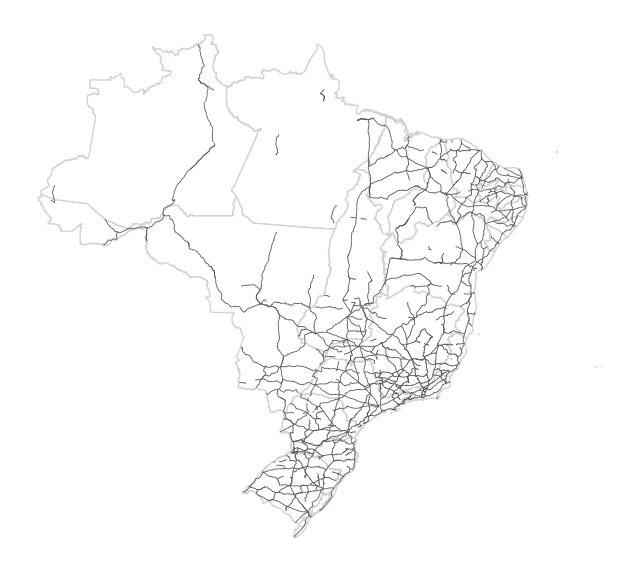

In [203]:
# Plotting the state boundaries and highways
fig, ax = plt.subplots(figsize=(8, 8))

states.plot(ax=ax, facecolor="white", edgecolor="lightgray")
highways.plot(ax=ax, linewidth=0.6, color="#565555", label="Road Infrastructure highways (2000)")

ax.axis("off")
plt.show()

In [212]:
# Using the highway shapefile, we categorize radial and non-radial highways.
# The column 'dm_anlys_p' == 1 indicates the highway is included in the analysis.
# The column 'dm_radial' indicates whether a highway is radial (1) or not (0).

non_radial_highways = highways[
    (highways["dm_anlys_p"] == 1) & (highways["dm_radial"] == 0)
]
radial_highways = highways[
    (highways["dm_anlys_p"] == 1) & (highways["dm_radial"] == 1)
]

In [187]:
# Load and simplify the minimum spanning tree (MST) shapefile for pie distribution
mst_pie = gpd.read_file(os.path.join(GIS_data, "mst//mst_pie_prj.shp"))
mst_pie

,PATHID,PATHCOST,REGION1,REGION2,geometry
0,6,1.807626,22,23,"LINESTRING (-34.954 -8.09086, -35.01555 -8.222..."
1,7,1.781380,24,23,"LINESTRING (-37.05691 -10.85093, -36.92548 -10..."
2,8,4.462587,19,18,"LINESTRING (-42.83992 -5.06792, -42.70849 -5.0..."
3,9,4.072512,20,18,"LINESTRING (-35.21687 -5.85651, -35.3483 -5.78..."
4,11,11.973323,19,1,"LINESTRING (-42.83992 -5.06792, -42.90121 -5.1..."
5,13,1.406314,20,21,"LINESTRING (-35.21687 -5.85651, -35.1743 -5.98..."
6,14,0.945738,22,21,"LINESTRING (-34.954 -8.09086, -34.92778 -7.959..."
7,3,5.695476,1,8,"LINESTRING (-47.83434 -15.84535, -47.85032 -15..."
8,5,8.730128,17,8,"LINESTRING (-44.28567 -2.57071, -44.35492 -2.7..."
9,7,4.421051,17,5,"LINESTRING (-44.28567 -2.57071, -44.41711 -2.5..."


In [188]:
mst_pie["geometry"] = mst_pie["geometry"].simplify(tolerance=0.01, preserve_topology=True)
mst_pie_simple = mst_pie

In [214]:
# Read city data for Brazilian capital cities
capital_cities = gpd.read_file(os.path.join(GIS_data, "cities//brazil_capital_cities_prj.shp"))
capital_cities

,FID_1,OBJECTID,CITY_NAME,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,CNTRY_NAME,STATUS,POP,POP_RANK,POP_CLASS,PORT_ID,LABEL_FLAG,POP_SOURCE,geometry
0,1,1,Cuiaba,BRA-MGR,Mato Grosso,BR,Brazil,Provincial capital,540814,3,"500,000 to 999,999",0,0,UN_Data_2010_2020,POINT (-56.093 -15.615)
1,2,2,Brasilia,BRA-DFD,Distrito Federal,BR,Brazil,National and provincial capital,2481272,2,"1,000,000 to 4,999,999",0,0,UN_Data_2010_2020,POINT (-47.89775 -15.79211)
2,3,3,Goiania,BRA-GOI,Goias,BR,Brazil,Provincial capital,1297154,2,"1,000,000 to 4,999,999",0,0,UN_Data_2010_2020,POINT (-49.255 -16.727)
3,4,4,Campo Grande,BRA-MGD,Mato Grosso do Sul,BR,Brazil,Provincial capital,776242,3,"500,000 to 999,999",0,0,UN_Data_2010_2020,POINT (-54.616 -20.451)
4,50,50,Rio Branco,BRA-ACR,Acre,BR,Brazil,Provincial capital,308545,4,"250,000 to 499,999",0,0,UN_Data_2010_2020,POINT (-67.812 -9.979)
5,86,86,Belem,BRA-PAR,Para,BR,Brazil,Provincial capital,1381475,2,"1,000,000 to 4,999,999",12490,0,UN_Data_2010_2020,POINT (-48.498 -1.439)
6,88,88,Manaus,BRA-AMZ,Amazonas,BR,Brazil,Provincial capital,1792881,2,"1,000,000 to 4,999,999",12560,0,UN_Data_2010_2020,POINT (-60.015 -3.122)
7,89,89,Porto Velho,BRA-RND,Rondonia,BR,Brazil,Provincial capital,369259,4,"250,000 to 499,999",0,0,UN_Data_2010_2020,POINT (-63.906 -8.762)
8,90,90,Palmas,BRA-TCN,Tocantins,BR,Brazil,Provincial capital,221742,5,"100,000 to 249,999",0,0,UN_Data_2010_2020,POINT (-48.36035 -10.21277)
9,144,144,Sao Paulo,BRA-SPA,Sao Paulo,BR,Brazil,Provincial capital,11152968,1,"5,000,000 and greater",0,1,UN_Data_2010_2020,POINT (-46.623 -23.581)


In [215]:
# Extract X and Y coordinates from geometry for plotting city labels
capital_cities["X"] = capital_cities.geometry.x
capital_cities["Y"] = capital_cities.geometry.y

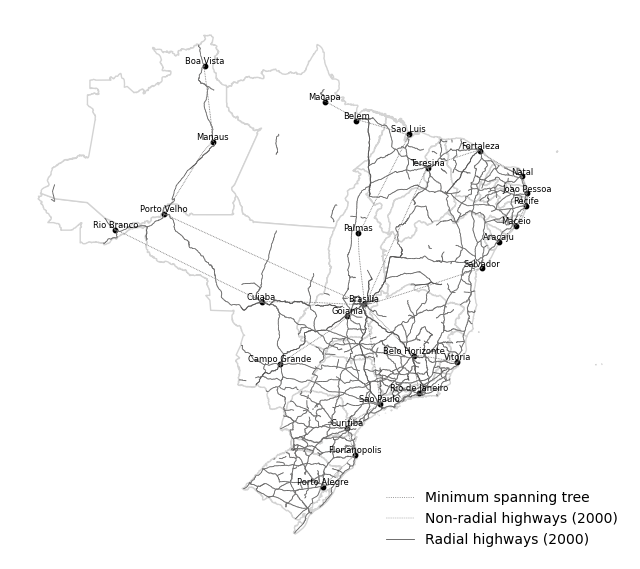

In [216]:
# We now replicate the main figure.
fig, ax = plt.subplots(figsize=(8, 8))

states.plot(ax=ax, facecolor="white", edgecolor="lightgray")

highways.plot(ax=ax, linewidth=0.6, color="#565555", label="Road Infrastructure highways (2000)")

mst_pie_simple.plot(
    ax=ax, linewidth=0.6, linestyle=(0, (1, 1)), color="#777676", label="Minimum spanning tree"
)

# Plot non-radial highways with dashed lines
non_radial_highways.plot(
    ax=ax, linewidth=0.3, linestyle="--", color="#868686", label="Non-radial highways (2000)"
)

# Plot radial highways with solid lines
radial_highways.plot(
    ax=ax, linewidth=0.6, linestyle="-", color="#565555", label="Radial highways (2000)"
)

# Plotting the cities with black dots.
ax.scatter(capital_cities["X"], capital_cities["Y"], s=10, color="black")

# Labeling each capital city with its name, centered and slightly below the point
for idx, row in capital_cities.iterrows():
    ax.text(row["X"], row["Y"], row["CITY_NAME"], fontsize=6, ha='center', va='bottom')

# Adding the legend for the highways.
legend_elements = [
    Line2D([0], [0], color="#777676", lw=0.6, linestyle="dotted", label="Minimum spanning tree"),
    Line2D([0], [0], color="#868686", lw=0.3, linestyle="dashed", label="Non-radial highways (2000)"),
    Line2D([0], [0], color="#565555", lw=0.6, linestyle="-", label="Radial highways (2000)"),
]

ax.legend(handles=legend_elements, loc="lower right", frameon=False)
ax.axis("off")
plt.show()